In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pickle import dump

In [3]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [5]:
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [6]:
train_set['wage_class']=np.where(train_set['wage_class']==' <=50K',0,1)

In [7]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


## Data Analysis

In [8]:
## Missing Values

In [9]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


We can see that we have no missing values

In [10]:
numerical_feat=[features for features in train_set.columns if train_set[features].dtypes!='O']
numerical_feat

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'wage_class']

In [11]:
for features in numerical_feat:
    print(features,"=>",len(train_set[features].unique()),"unique features")

age => 73 unique features
fnlwgt => 21648 unique features
education_num => 16 unique features
capital_gain => 119 unique features
capital_loss => 92 unique features
hours_per_week => 94 unique features
wage_class => 2 unique features


In [12]:
categor_feat = [features for features in train_set.columns if train_set[features].dtypes=='O']
categor_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

Proper encoding or conversion of these variables is necessary for the feature engineering. We will look at these attributes and convert them one by one.

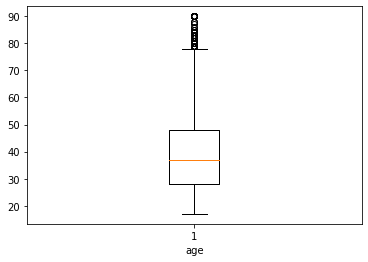

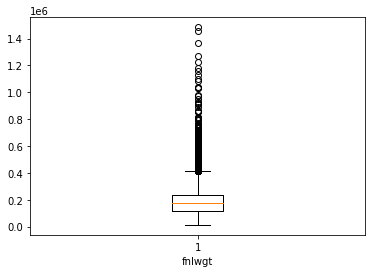

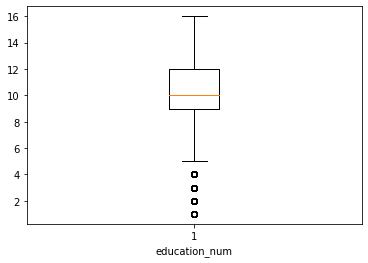

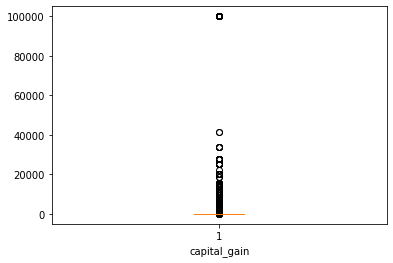

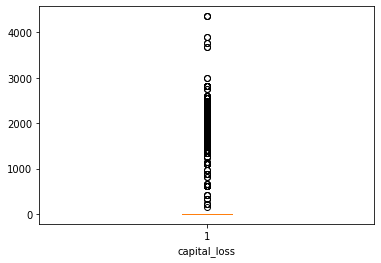

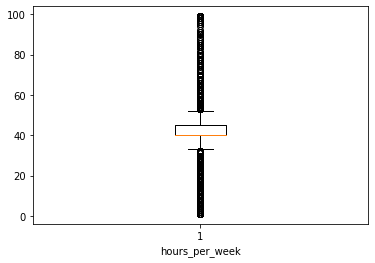

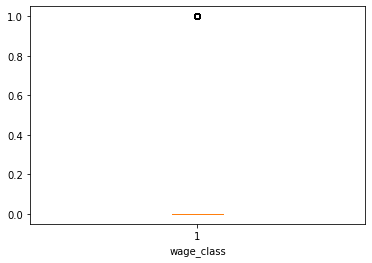

In [13]:
## Outliers
for features in numerical_feat:
    plt.boxplot(train_set[features])
    plt.xlabel(features)
    plt.show()

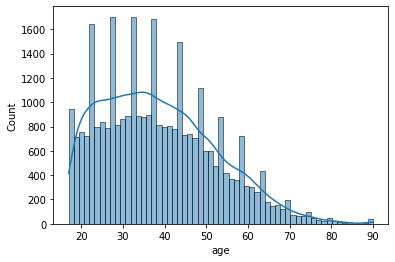

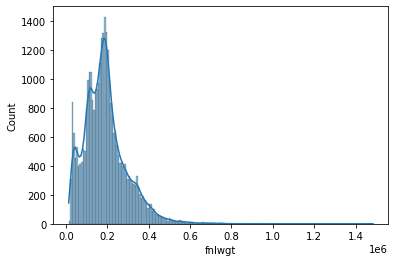

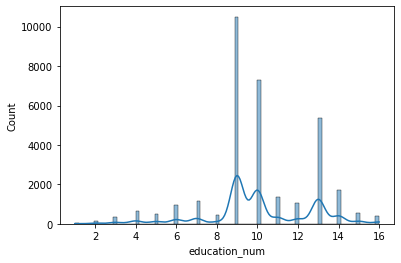

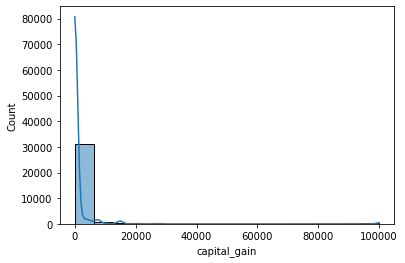

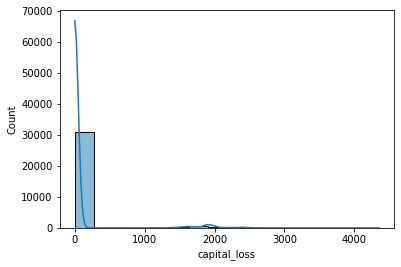

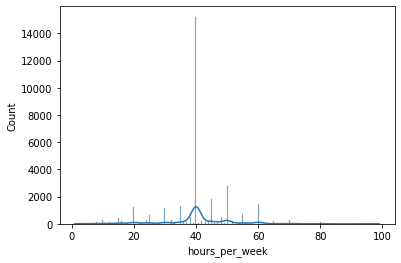

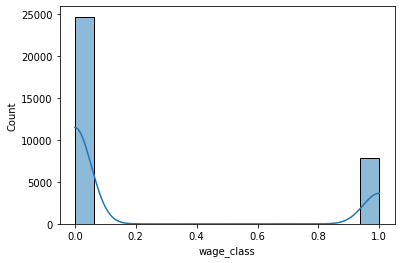

In [14]:
## distribution
for features in numerical_feat:
    sns.histplot(train_set[features],kde=1)
    plt.xlabel(features)
    plt.show()

we can see that the features are not normally distributed or are skewed in nature.

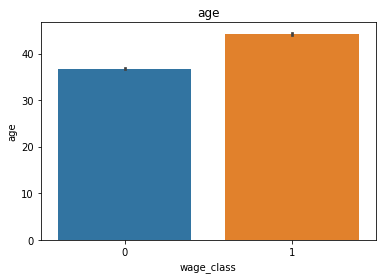

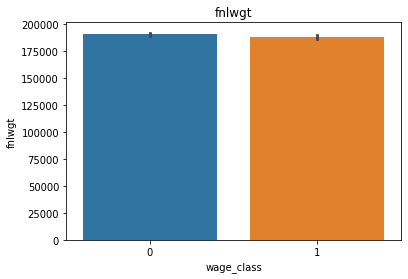

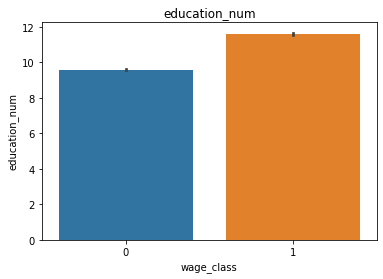

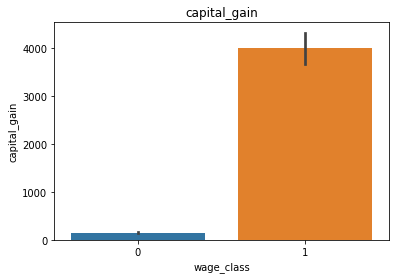

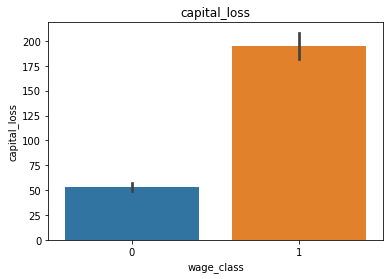

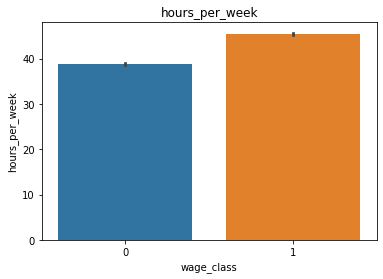

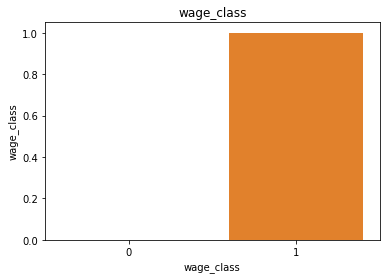

In [15]:
for feature in numerical_feat:
    sns.barplot(x='wage_class',y=feature,data=train_set)
    plt.title(feature)
    plt.show()

## Feature Engineering

In [16]:
#categorical feature

In [17]:
categor_feat

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [18]:
#workclass
train_set['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

We can see the frequency of private is more in workclass and without-pay and never-worked are very less and can be combined into one feature.

In [19]:
train_set['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

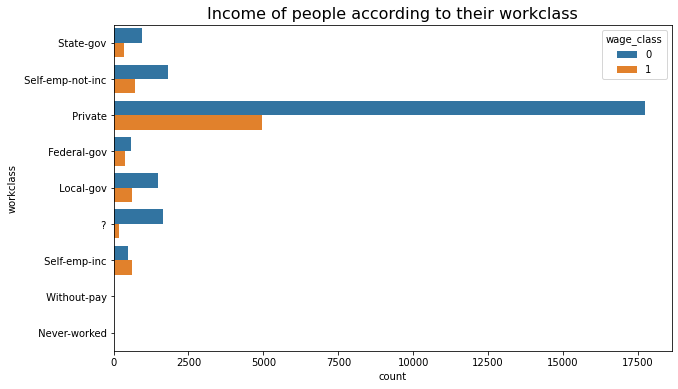

In [20]:
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = train_set['workclass'], hue = train_set['wage_class'])
plt.show()

In [21]:
train_set['workclass']=np.where(train_set['workclass']==' Without-pay',' Never-worked',train_set['workclass'])

We can also remove the value ? with the mode of tht data treating it as missing values

In [22]:
train_set['workclass']=np.where(train_set['workclass']==' ?',train_set['workclass'].mode(),train_set['workclass'])

In [23]:
train_set['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

Now we can see that we have 7 unique values that have imbalanced frequency distribution

We will use frequency encoding to encode these values

In [24]:
fq = train_set.groupby('workclass').size()/len(train_set)
fq

workclass
 Federal-gov         0.029483
 Local-gov           0.064279
 Never-worked        0.000645
 Private             0.753417
 Self-emp-inc        0.034274
 Self-emp-not-inc    0.078038
 State-gov           0.039864
dtype: float64

In [25]:
train_set["workclass"]=train_set["workclass"].map(fq)

In [26]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0.039864,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,0.078038,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,0.753417,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,0.753417,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,0.753417,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Since education_num is kind of th encoded version of education feature we will drop education 

In [27]:
#education
train_set.drop('education',axis=1,inplace=True)

In [28]:
#marital_status
train_set['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
train_set['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

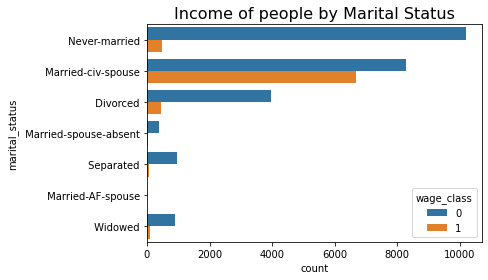

In [30]:
plt.title("Income of people by Marital Status", fontsize = 16)
sns.countplot(y = train_set['marital_status'], hue = train_set['wage_class'])
plt.show()

Again we will frequency encode this feature as we have frequency imbalance in the unique values

In [31]:
fq=train_set.groupby('marital_status').size()/len(train_set)
fq

marital_status
 Divorced                 0.136452
 Married-AF-spouse        0.000706
 Married-civ-spouse       0.459937
 Married-spouse-absent    0.012837
 Never-married            0.328092
 Separated                0.031479
 Widowed                  0.030497
dtype: float64

In [32]:
train_set['marital_status']=train_set['marital_status'].map(fq)

In [33]:
#occupation
train_set['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

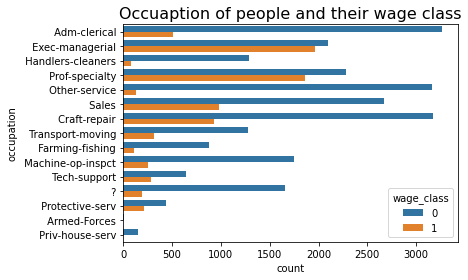

In [34]:
plt.title("Occuaption of people and their wage class",fontsize=16)
sns.countplot(y=train_set['occupation'],hue=train_set['wage_class'])
plt.show()

In [35]:
train_set['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Now we will replace the ? value with the mode of the dataset and then frequency encode the dataset feature

In [36]:
train_set['occupation']=np.where(train_set['occupation']==' ?',train_set['occupation'].mode(),train_set['occupation'])

In [37]:
fq=train_set.groupby('occupation').size()/len(train_set)
fq

occupation
 Adm-clerical         0.115783
 Armed-Forces         0.000276
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Farming-fishing      0.030527
 Handlers-cleaners    0.042075
 Machine-op-inspct    0.061485
 Other-service        0.101195
 Priv-house-serv      0.004576
 Prof-specialty       0.183747
 Protective-serv      0.019932
 Sales                0.112097
 Tech-support         0.028500
 Transport-moving     0.049046
dtype: float64

In [38]:
train_set['occupation']=train_set['occupation'].map(fq)

In [39]:
#relationship
train_set['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [40]:
train_set['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

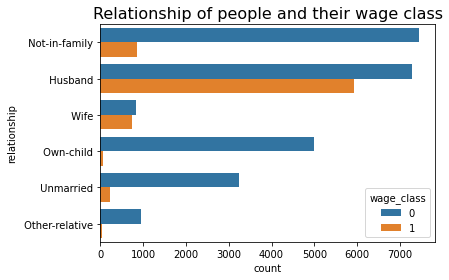

In [41]:
plt.title("Relationship of people and their wage class",fontsize=16)
sns.countplot(y=train_set['relationship'],hue=train_set['wage_class'])
plt.show()

Husbands have more income so frequency encode this

In [42]:
fq=train_set.groupby('relationship').size()/len(train_set)
fq

relationship
 Husband           0.405178
 Not-in-family     0.255060
 Other-relative    0.030128
 Own-child         0.155646
 Unmarried         0.105832
 Wife              0.048156
dtype: float64

In [43]:
train_set['relationship']=train_set['relationship'].map(fq)

In [44]:
#race
train_set['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [45]:
train_set['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

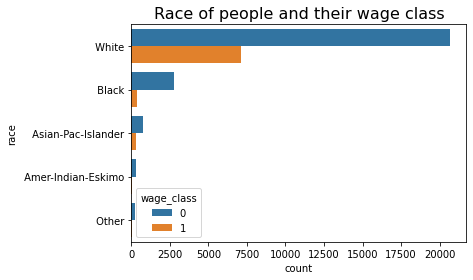

In [46]:
plt.title("Race of people and their wage class",fontsize=16)
sns.countplot(y=train_set['race'],hue=train_set['wage_class'])
plt.show()

On an average whites earn more in general we will frequency encode this feature

In [47]:
fq=train_set.groupby('race').size()/len(train_set)
fq

race
 Amer-Indian-Eskimo    0.009551
 Asian-Pac-Islander    0.031909
 Black                 0.095943
 Other                 0.008323
 White                 0.854274
dtype: float64

In [48]:
train_set['race']=train_set['race'].map(fq)

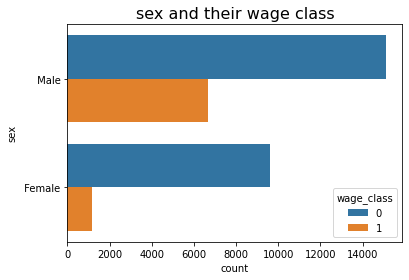

In [49]:
#sex
plt.title("sex and their wage class",fontsize=16)
sns.countplot(y=train_set['sex'],hue=train_set['wage_class'])
plt.show()

On an average we Men earn more than women we will binary encode this feature

In [50]:
train_set['sex']=np.where(train_set['sex']==' Male',0,1)

In [51]:
#native country
train_set['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [52]:
train_set['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Americans earn more than any other native country so we will encode this variable as USA or Non-Usa

In [53]:
train_set['native_country']=np.where(train_set['native_country']==' United-States','USA',"non-USA")

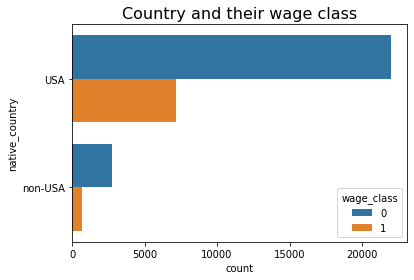

In [54]:
plt.title("Country and their wage class",fontsize=16)
sns.countplot(y=train_set['native_country'],hue=train_set['wage_class'])
plt.show()

In [55]:
train_set['native_country']=np.where(train_set['native_country']=='USA',1,0)

In [56]:
train_set.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0.039864,77516,13,0.328092,0.115783,0.255060,0.854274,0,2174,0,40,1,0
1,50,0.078038,83311,13,0.459937,0.124873,0.405178,0.854274,0,0,0,13,1,0
2,38,0.753417,215646,9,0.136452,0.042075,0.255060,0.854274,0,0,0,40,1,0
3,53,0.753417,234721,7,0.459937,0.042075,0.405178,0.095943,0,0,0,40,1,0
4,28,0.753417,338409,13,0.459937,0.183747,0.048156,0.095943,1,0,0,40,0,0


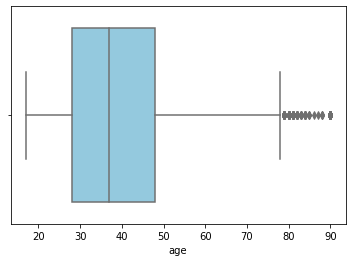

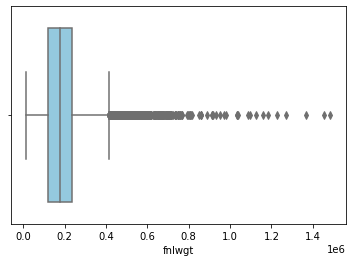

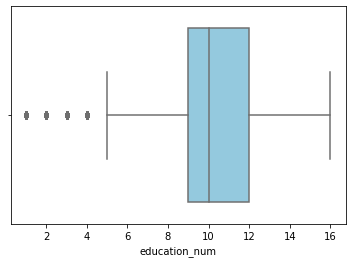

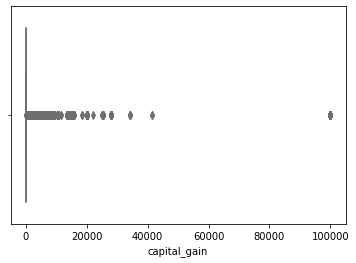

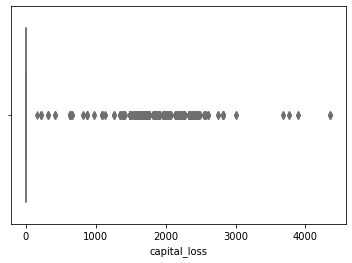

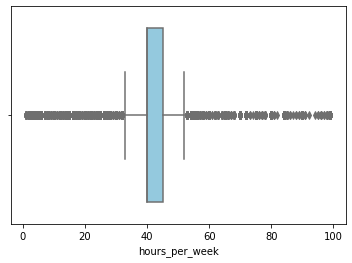

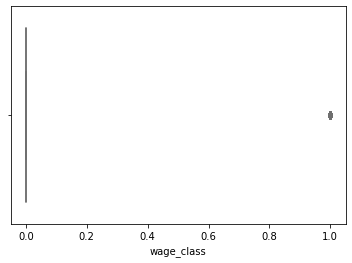

In [57]:
## Outliers
for features in numerical_feat:
    sns.boxplot(x=train_set[features], color = 'skyblue')
    plt.show()

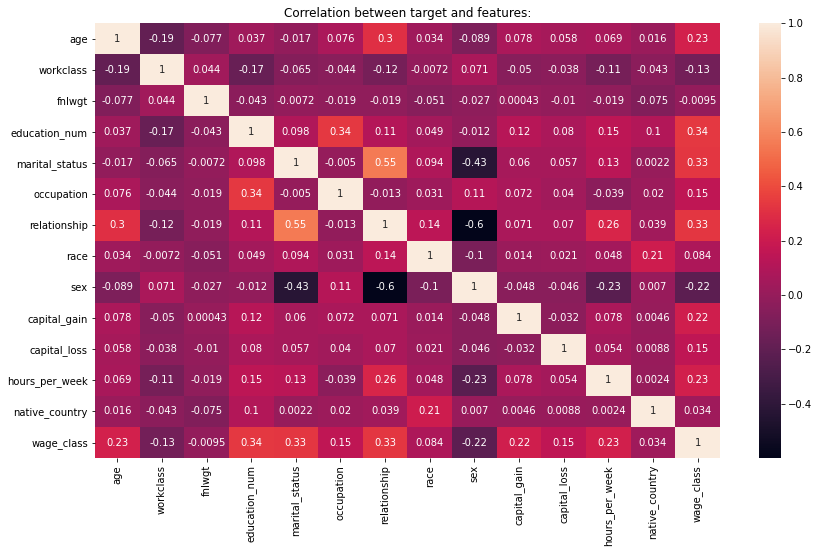

In [58]:
plt.figure(figsize = (14, 8))
plt.title("Correlation between target and features:")
sns.heatmap(train_set.corr(), annot = True)
plt.show()

In [59]:
X=train_set.drop('wage_class',axis=1)
y=train_set['wage_class']

In [60]:
X_col=X.columns

In [61]:
## scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=X_col)
X.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.301370,0.052099,0.044302,0.800000,0.712900,0.629561,0.599738,1.000000,0.0,0.02174,0.0,0.397959,1.0
1,0.452055,0.102811,0.048238,0.800000,1.000000,0.679109,1.000000,1.000000,0.0,0.00000,0.0,0.122449,1.0
2,0.287671,1.000000,0.138113,0.533333,0.295593,0.227821,0.599738,1.000000,0.0,0.00000,0.0,0.397959,1.0
3,0.493151,1.000000,0.151068,0.400000,1.000000,0.227821,1.000000,0.103576,0.0,0.00000,0.0,0.397959,1.0
4,0.150685,1.000000,0.221488,0.800000,1.000000,1.000000,0.048067,0.103576,1.0,0.00000,0.0,0.397959,0.0


In [97]:
dump(scaler,open('../scaler.pkl','wb'))

In [62]:
## Data imbalance

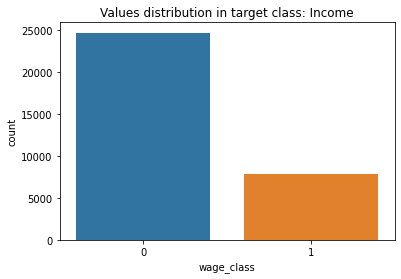

In [63]:
plt.title("Values distribution in target class: Income")
sns.countplot(data = train_set, x = 'wage_class')
plt.show()

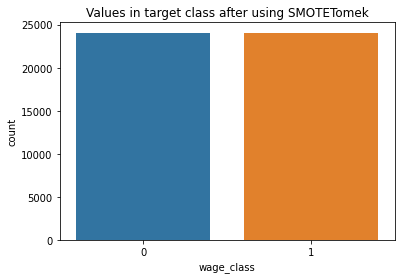

In [64]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X,y = smk.fit_resample(X, y)

plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y)
plt.show()

## Model training

In [65]:
import xgboost as xgb

In [66]:
model=xgb.XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
model.score(X,y)

0.9329025018701688

In [68]:
def preprocessing(df):
    df['wage_class']=np.where(df['wage_class']==' <=50K.',0,1)
    df['workclass']=np.where(df['workclass']==' Without-pay',' Never-worked',df['workclass'])
    df['workclass']=np.where(df['workclass']==' ?',df['workclass'].mode(),df['workclass'])
    fq = train_set.groupby('workclass').size()/len(train_set)
    df["workclass"]=df["workclass"].map(fq)
    df.drop('education',axis=1,inplace=True)
    fq=train_set.groupby('marital_status').size()/len(train_set)
    df['marital_status']=df['marital_status'].map(fq)
    df['occupation']=np.where(df['occupation']==' ?',train_set['occupation'].mode(),df['occupation'])
    fq=train_set.groupby('occupation').size()/len(train_set)
    df['occupation']=df['occupation'].map(fq)
    fq=train_set.groupby('relationship').size()/len(train_set)
    df['relationship']=df['relationship'].map(fq)
    fq=train_set.groupby('race').size()/len(train_set)
    df['race']=df['race'].map(fq)
    df['sex']=np.where(df['sex']==' Male',0,1)
    df['native_country']=np.where(df['native_country']==' United-States',1,0)
    X_test=df.drop('wage_class',axis=1)
    y_test=df['wage_class']
    X_col=X_test.columns
    X_test=scaler.transform(X_test)
    X_test=pd.DataFrame(X_test,columns=X_col)
    return(X_test,y_test)

In [69]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
train_set.columns = col_labels
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [70]:
test_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [71]:
X_test,y_test=preprocessing(test_set)

In [72]:
X_test

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.109589,0.925095,0.145690,0.400000,0.712900,0.333612,0.334671,0.103576,0.0,0.000000,0.0,0.397959,1.0
1,0.287671,0.925095,0.052654,0.533333,1.000000,0.164881,1.000000,1.000000,0.0,0.000000,0.0,0.500000,1.0
2,0.150685,0.084533,0.220498,0.733333,1.000000,0.107131,1.000000,1.000000,0.0,0.000000,0.0,0.397959,1.0
3,0.369863,0.925095,0.100541,0.600000,1.000000,0.333612,1.000000,0.103576,0.0,0.076881,0.0,0.397959,1.0
4,0.013699,0.925095,0.061947,0.600000,0.712900,0.691496,0.334671,1.000000,1.0,0.000000,0.0,0.295918,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.301370,0.925095,0.137959,0.800000,0.295593,0.691496,0.599738,1.000000,1.0,0.000000,0.0,0.357143,1.0
16277,0.643836,0.925095,0.209939,0.533333,0.064870,0.691496,0.000000,0.103576,0.0,0.000000,0.0,0.397959,1.0
16278,0.287671,0.925095,0.246328,0.800000,1.000000,0.691496,1.000000,1.000000,0.0,0.000000,0.0,0.500000,1.0
16279,0.369863,0.925095,0.048632,0.800000,0.295593,0.629561,0.334671,0.027882,0.0,0.054551,0.0,0.397959,1.0


In [73]:
y_test

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 16281, dtype: int32

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score,classification_report

print("train set accuracy score :",accuracy_score(y,model.predict(X)))
print("test set accuracy score :",  accuracy_score(y_test,model.predict(X_test)))

train set accuracy score : 0.9329025018701688
test set accuracy score : 0.8621092070511639


In [81]:
confusion_matrix(y_test,model.predict(X_test))

array([[11273,  1162],
       [ 1083,  2763]], dtype=int64)

roc_auc_score:  0.8124814087859051


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


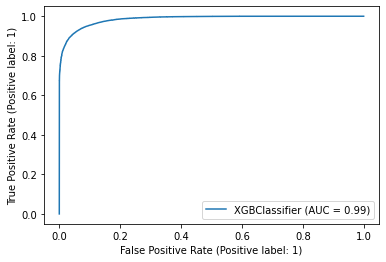

In [75]:
from sklearn.metrics import roc_curve,plot_roc_curve
print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
roc_curve(y_test, model.predict(X_test))
plot_roc_curve(model,X,y)

## Grid search

In [85]:
from sklearn.model_selection import GridSearchCV

parameter ={
    "n_estimators": [100,120,140,160,180,200],
    "max_depth" : [1,2,3,4,5,6,7,None]
}

grid=GridSearchCV(model,parameter,scoring='accuracy',cv=10)

In [86]:
#grid.fit(X,y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1, ...),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'n_estimators': [100, 120, 140, 160, 180, 200]},
             scoring='accuracy')

In [87]:
grid.best_params_

{'max_depth': 6, 'n_estimators': 180}

In [88]:
grid.best_score_

0.9106320484197085

In [89]:
print("train set accuracy score :",accuracy_score(y,grid.predict(X)))
print("test set accuracy score :",  accuracy_score(y_test,grid.predict(X_test)))

train set accuracy score : 0.9451832765356163
test set accuracy score : 0.863091947669062


In [91]:
confusion_matrix(y_test,model.predict(X_test))

array([[11273,  1162],
       [ 1083,  2763]], dtype=int64)

roc_auc_score:  0.8124814087859051


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


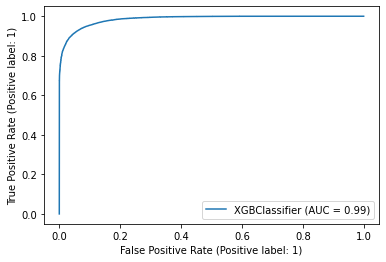

In [92]:
from sklearn.metrics import roc_curve,plot_roc_curve
print('roc_auc_score: ', roc_auc_score(y_test, model.predict(X_test)))
roc_curve(y_test, model.predict(X_test))
plot_roc_curve(model,X,y)

In [96]:
dump(grid,open('../model.pkl','wb'))